DISTRIBUTION PLOTS LECTURE

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


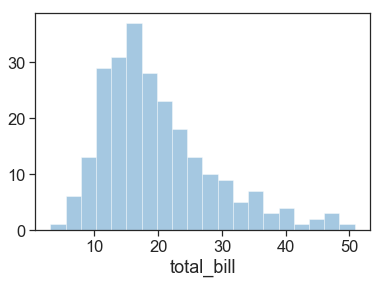

In [144]:
sns.distplot(tips['total_bill'],kde = False,bins = 20) #Kde plot is the sum of the normal distributions on the rugplot

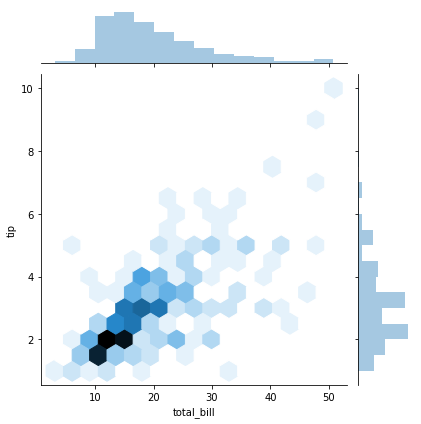

In [12]:
sns.jointplot(x= 'total_bill',y= 'tip',data = tips, kind = 'hex') #Creates hexagons where darker colour represents more data points fit within the region

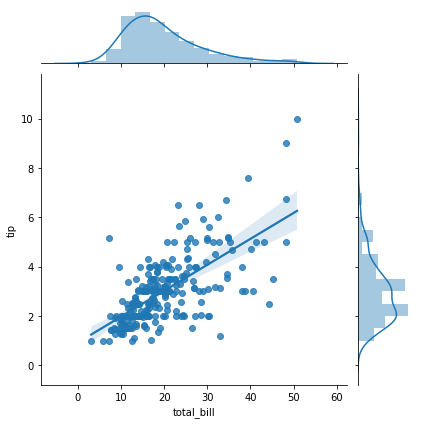

In [13]:
sns.jointplot(x= 'total_bill',y= 'tip',data = tips, kind = 'reg') #Linear Regression

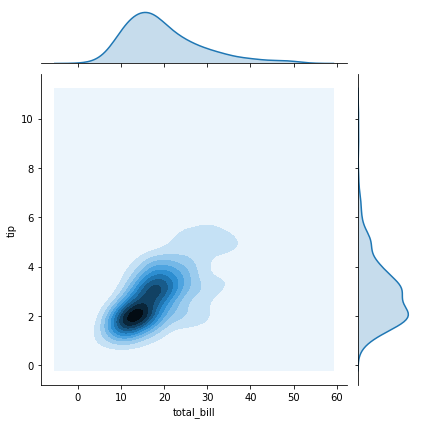

In [14]:
sns.jointplot(x= 'total_bill',y= 'tip',data = tips, kind = 'kde') 

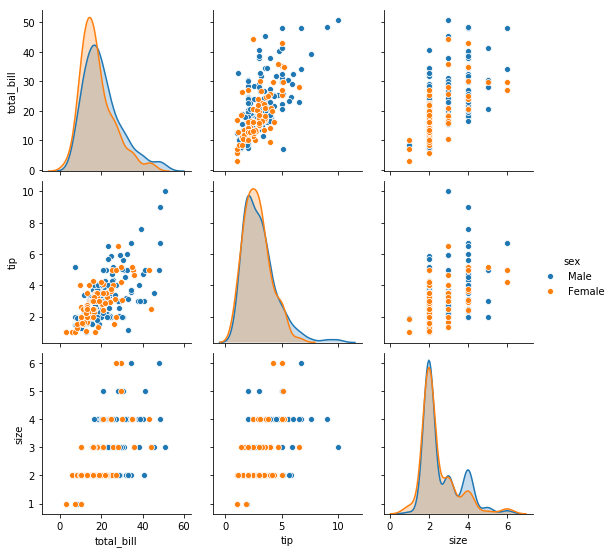

In [19]:
sns.pairplot(tips,hue = 'sex') #Hue colours the points of the category you want

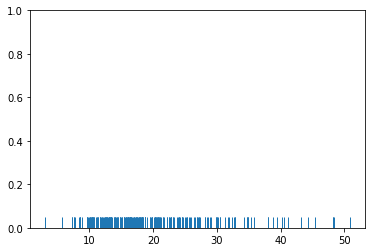

In [22]:
sns.rugplot(tips['total_bill']) #Dash mark for each data point
#In comparison, distplot creates bars depending on how many datapoints are in the respective bin

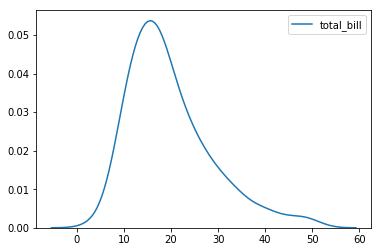

In [23]:
sns.kdeplot(tips['total_bill'])   #Just the kde plot with no histogram

CATEGORICAL PLOTS LECTURE:

In [35]:
tips.head()
import numpy as np

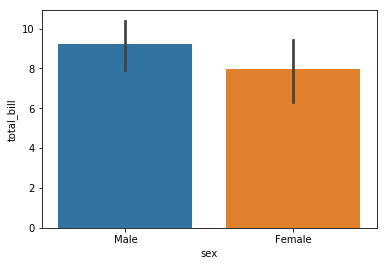

In [36]:
sns.barplot(x='sex', y='total_bill',data =tips,estimator = np.std) #bar plot with standard deviation of total_bill

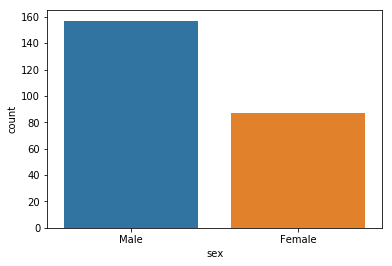

In [38]:
sns.countplot(x='sex',data = tips) #Count the amount of data point for each criterion

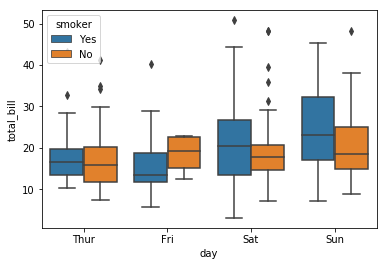

In [42]:
sns.boxplot(x='day',y='total_bill',data=tips,hue = 'smoker') #Whisker plot, lines represent quartiles
#Smoker is more likely to spend more on the weekends

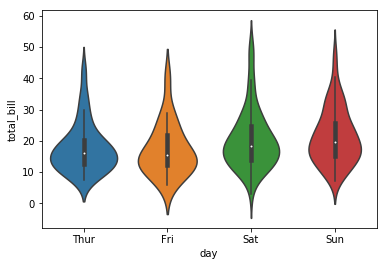

In [43]:
sns.violinplot(x= 'day' ,y= 'total_bill', data=tips)#Takes same arguments as boxplot (x = category, y= numerical)

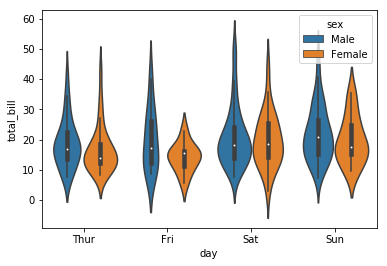

In [44]:
sns.violinplot(x= 'day' ,y= 'total_bill', data=tips, hue = 'sex')

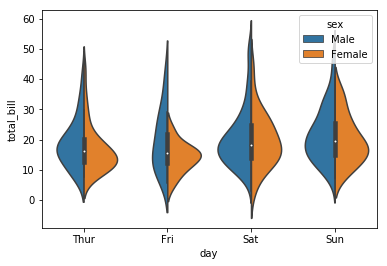

In [46]:
sns.violinplot(x= 'day' ,y= 'total_bill', data=tips, hue = 'sex', split = True)

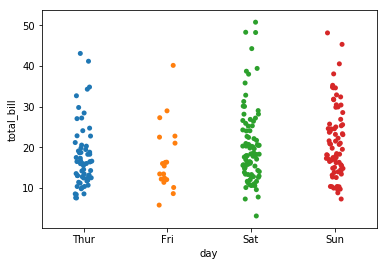

In [48]:
sns.stripplot(x='day',y = 'total_bill',data = tips,jitter = True)

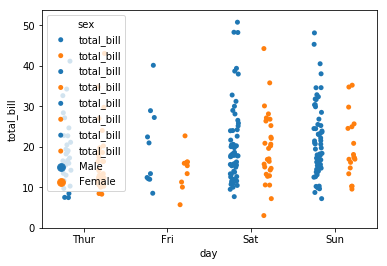

In [51]:
sns.stripplot(x='day',y = 'total_bill',data = tips,jitter = True,hue = 'sex', dodge = True)

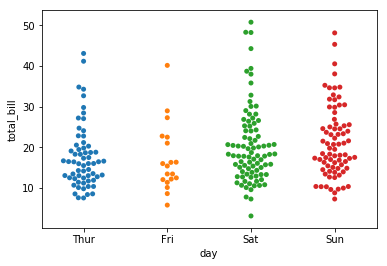

In [52]:
sns.swarmplot(x='day',y='total_bill',data=tips) #Strip and violin plot combines

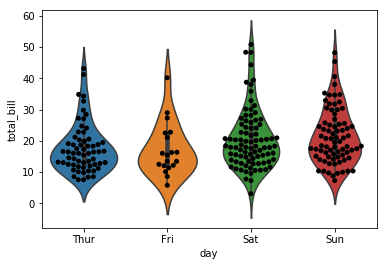

In [53]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color = 'black')

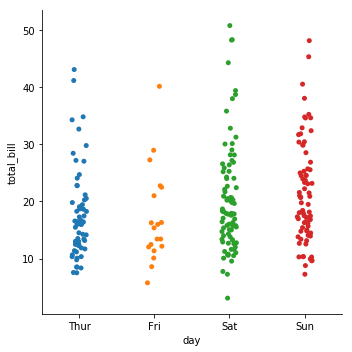

In [57]:
sns.catplot(x='day',y='total_bill',data=tips,kind = 'strip') #Kind lets you choose what plot you want from catplot

MATRIX PLOTS LECTURE

In [58]:
flights = sns.load_dataset('flights')

In [60]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [66]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


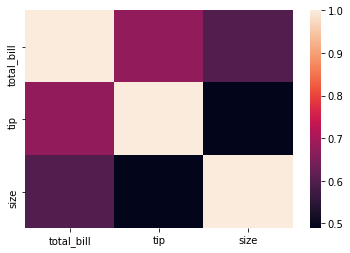

In [67]:
sns.heatmap(tc)

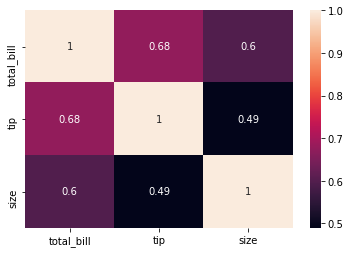

In [68]:
sns.heatmap(tc,annot = True) #annot gives you the correlation value

In [73]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


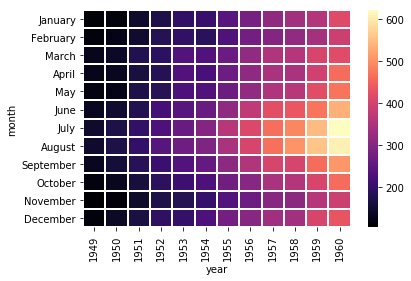

In [78]:
sns.heatmap (fp,cmap = 'magma',linewidths = 1) #Line widths gives you the seperation between boxes

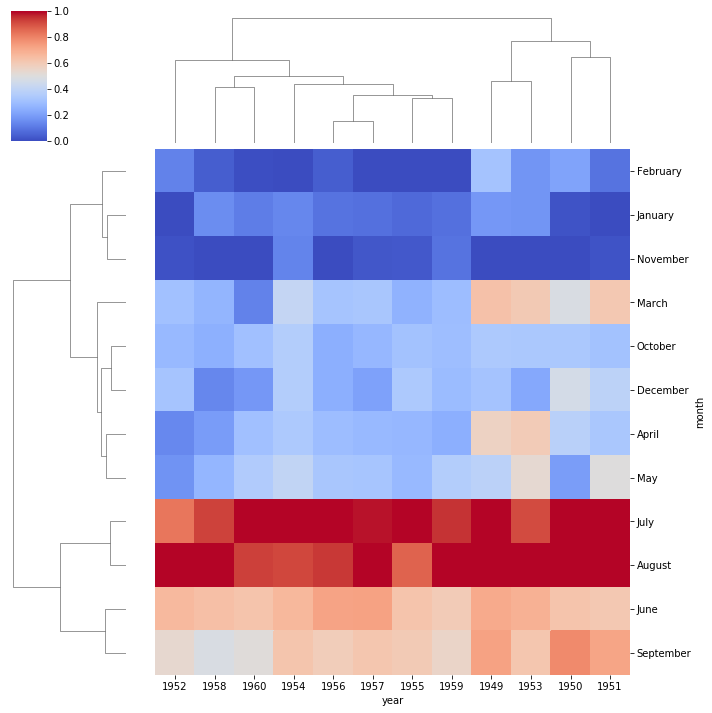

In [81]:
sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1)
#Standard_scale normalizes data
#Clusters information based on similarity (that's why months/years not in order)

GRIDS LECTURE

In [105]:
iris = sns.load_dataset('iris')
import matplotlib.pyplot as plt

In [83]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

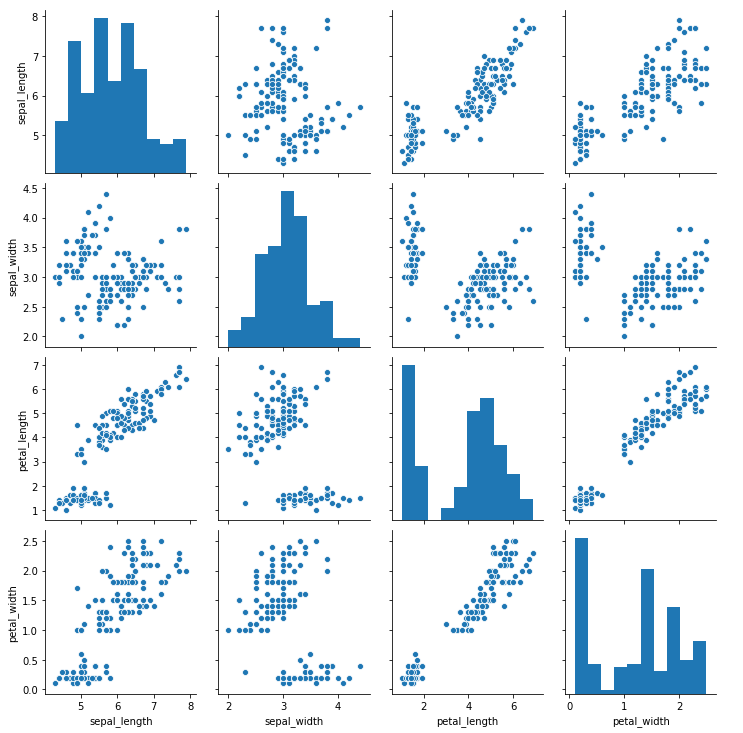

In [87]:
sns.pairplot(iris)

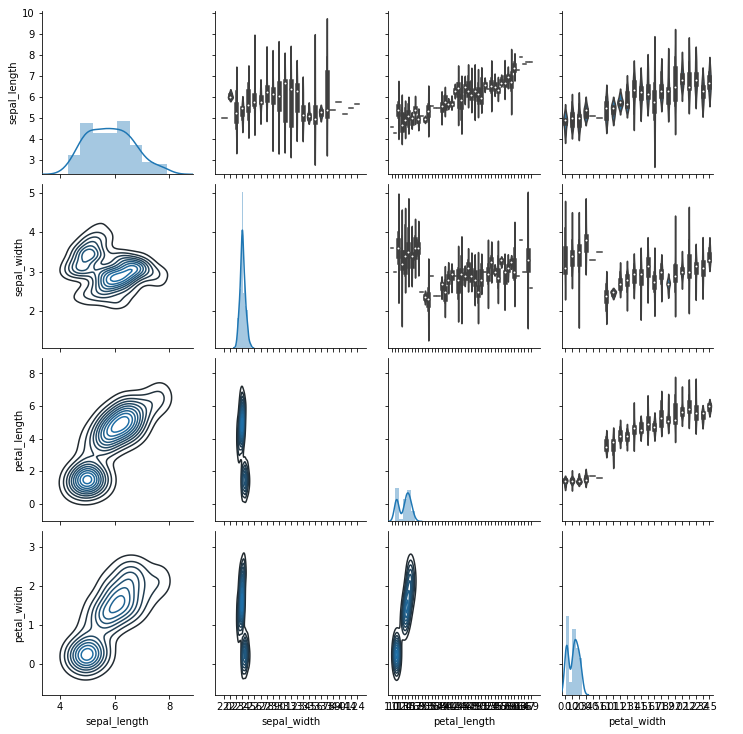

In [99]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(sns.violinplot)
g.map_lower(sns.kdeplot)

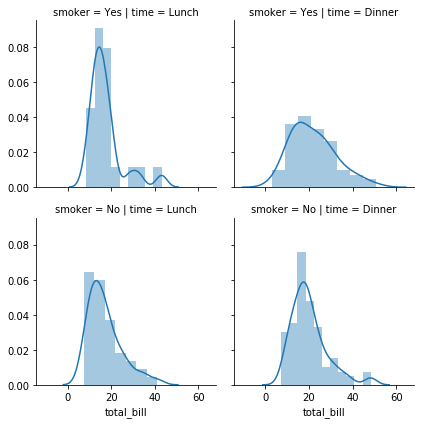

In [103]:
f = sns.FacetGrid(tips,col='time',row='smoker')
f.map(sns.distplot,'total_bill')

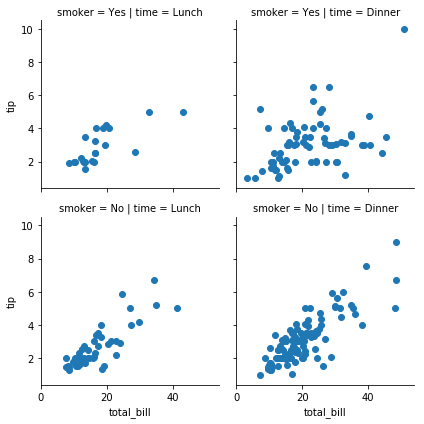

In [108]:
f = sns.FacetGrid(tips,col='time',row='smoker')
f.map(plt.scatter,'total_bill','tip')

REGRESSION PLOT LECTURE

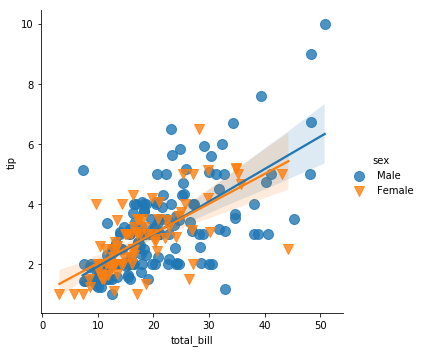

In [113]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue = 'sex',markers = ['o','v']
          ,scatter_kws={'s':100})
#markers give shape to distinct
#scatter_kws is size of marker

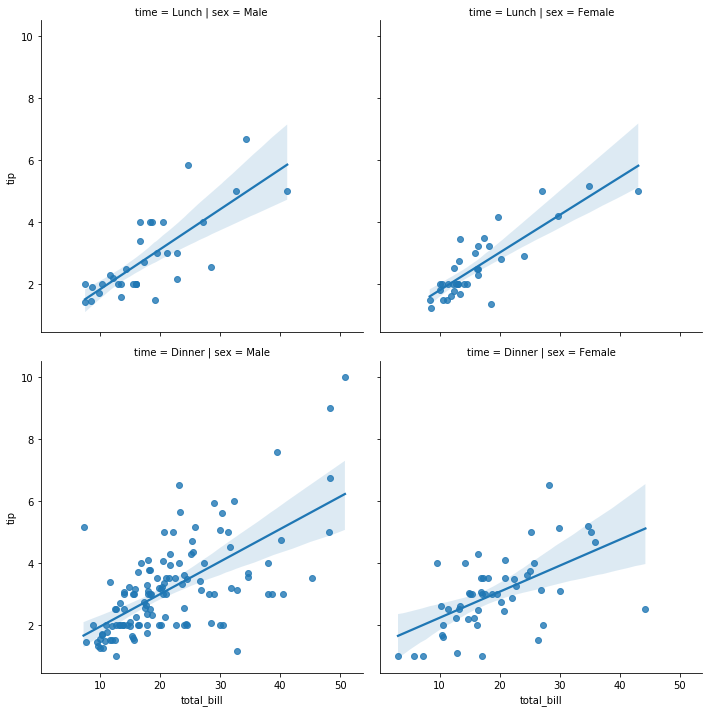

In [116]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row = 'time')
#col lets you seperate by columns
#row ''  ''   ''       '' rows

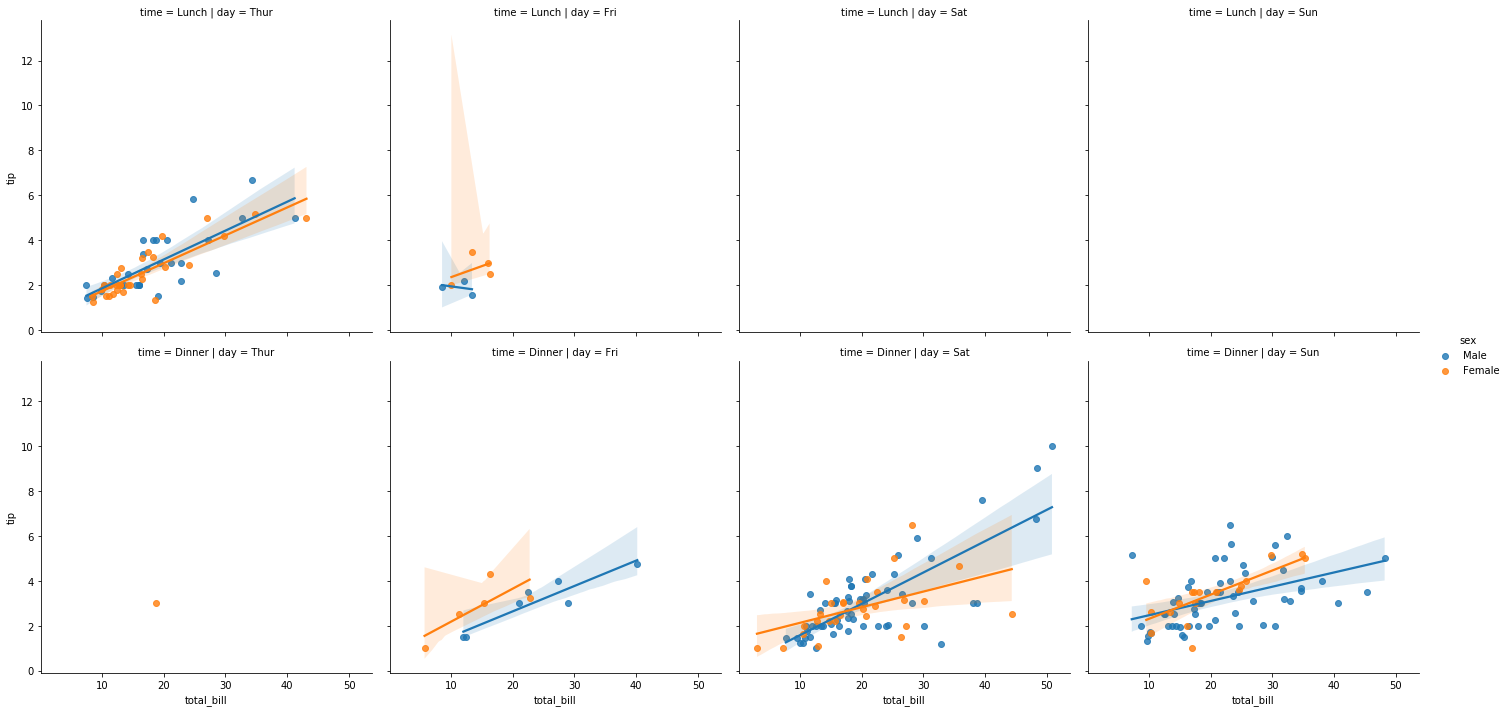

In [118]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row = 'time',hue = 'sex')
#Too much going on

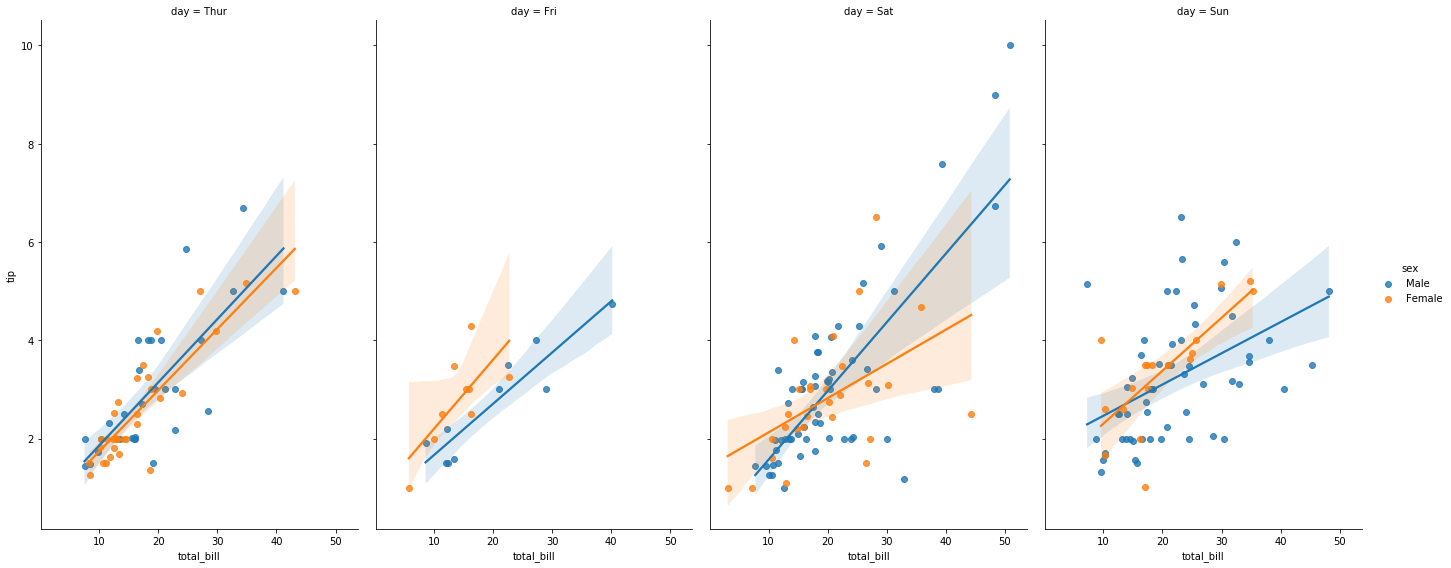

In [122]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue = 'sex',
          aspect = 0.6, height = 8)
#aspect is ratio of height to width


STYLE AND COLOUR LECTURE

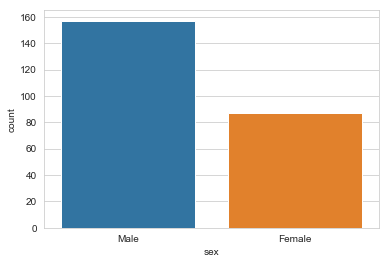

In [124]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

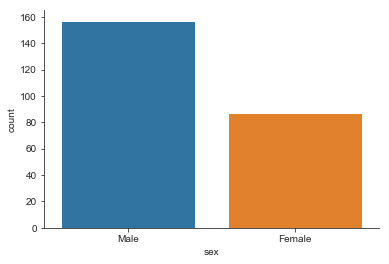

In [128]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()
#Set_style method stays in place for the next generated plot

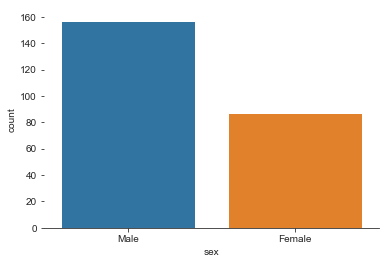

In [129]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

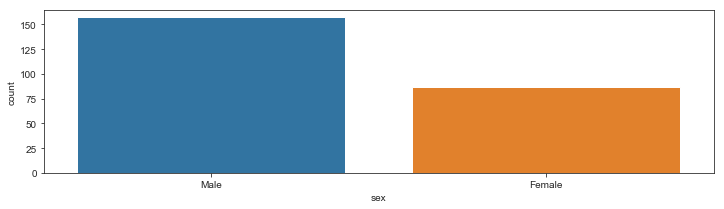

In [131]:
plt.figure(figsize=[12,3])
sns.countplot(x='sex',data=tips)

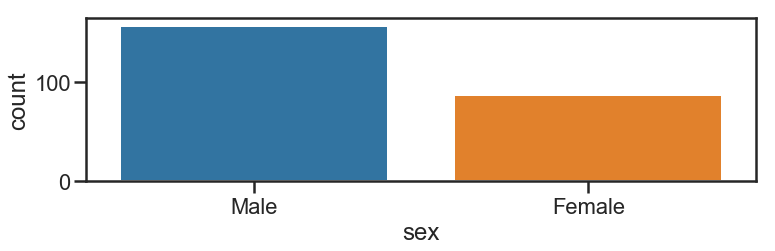

In [133]:
sns.set_context('poster')
plt.figure(figsize=[12,3])
sns.countplot(x='sex',data=tips)


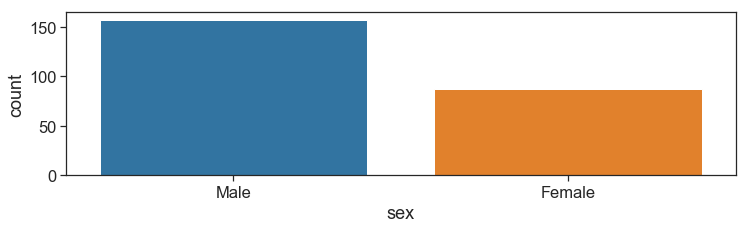

In [138]:
sns.set_context('notebook', font_scale = 1.5)
plt.figure(figsize=[12,3])
sns.countplot(x='sex',data=tips)

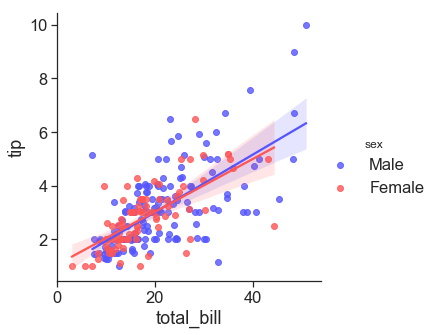

In [143]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette = 'seismic')